# Feature Detector

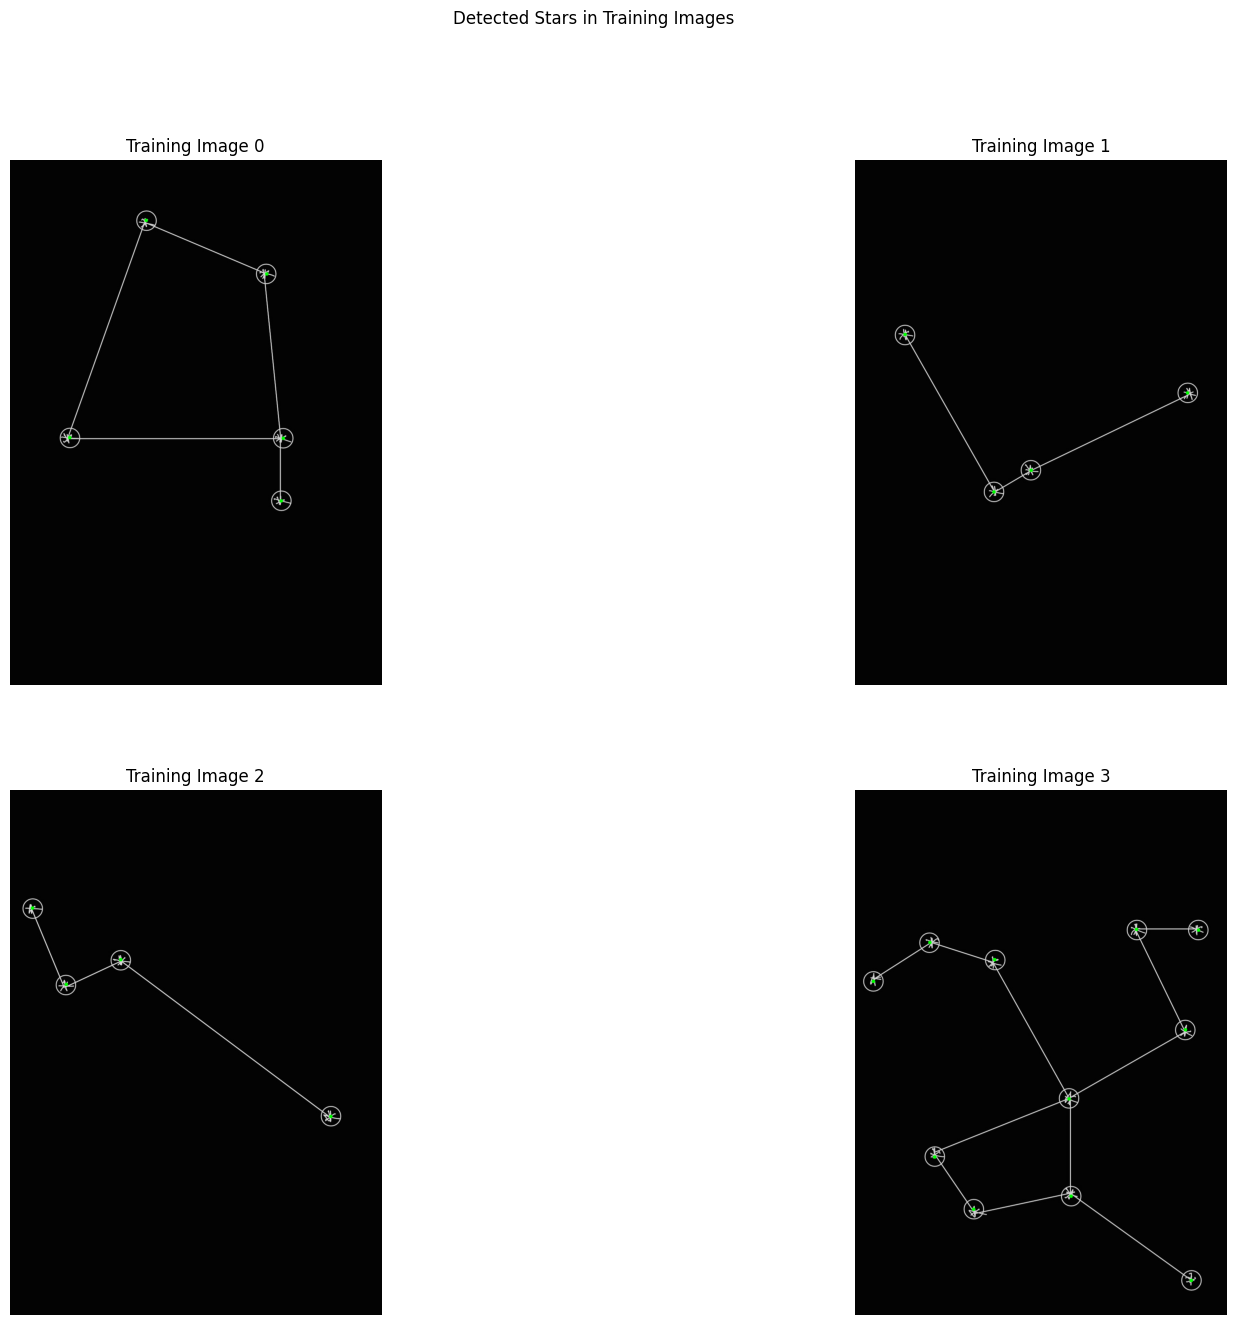

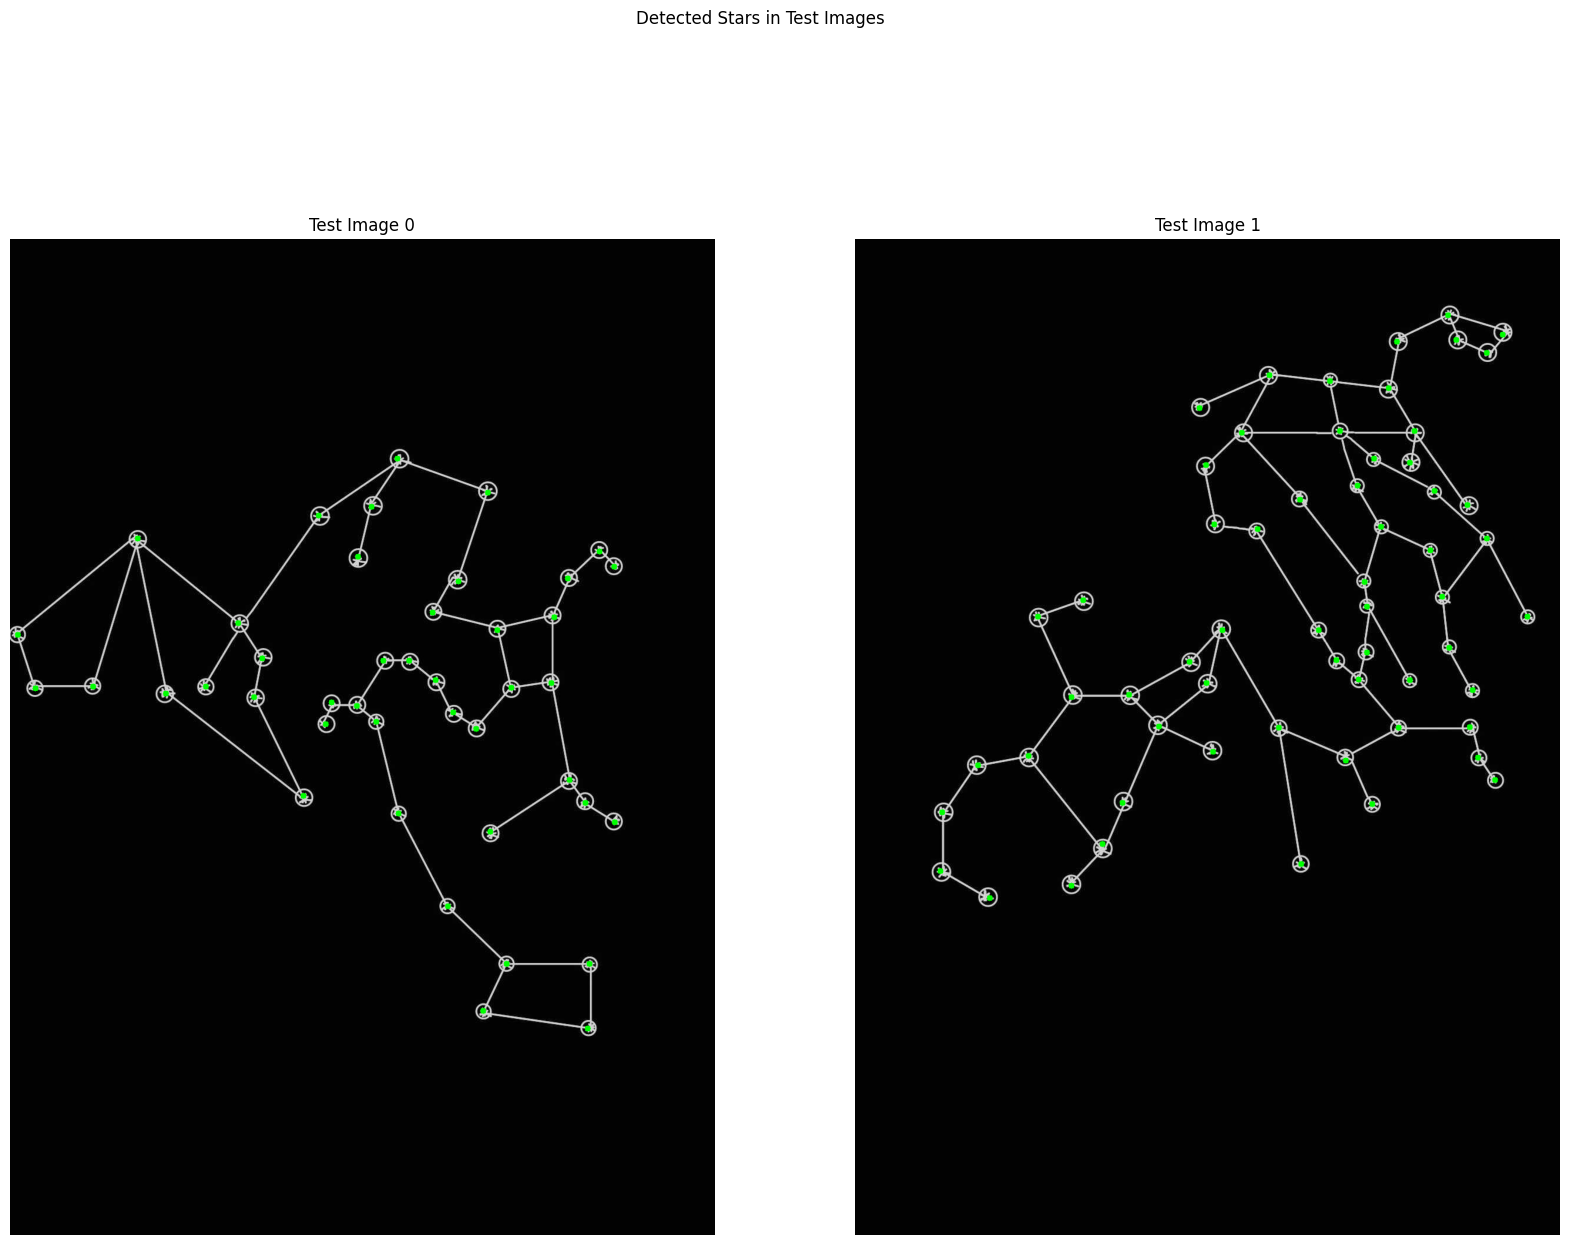

In [4]:
import os
import cv2
import json
import numpy as np
import matplotlib.pyplot as plt

def load_data(data_dir):
    images = []
    annotations = []
    for file_name in os.listdir(data_dir):
        if file_name.endswith('.jpg'):
            image_path = os.path.join(data_dir, file_name)
            json_path = image_path.replace('.jpg', '.json')
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            with open(json_path) as f:
                annotation = json.load(f)
            images.append(image)
            annotations.append(annotation)
    return images, annotations

def extract_coordinates(annotation):
    coords = []
    labels = []
    for shape in annotation['shapes']:
        coords.append(shape['points'])
        labels.append(shape['label'])
    return coords, labels

# Load training data (with JSON annotations)
train_images, train_annotations = load_data('/kaggle/input/stargazer/Contellations Segmentation/train')

# Load test images (without JSON annotations)
def load_test_images(data_dir):
    images = []
    for file_name in os.listdir(data_dir):
        if file_name.endswith('.jpg'):
            image_path = os.path.join(data_dir, file_name)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            images.append(image)
    return images

test_images = load_test_images('/kaggle/input/stargazer/Contellations Segmentation/test')

# Function to detect stars in training images
def detect_stars_training(image, visualize=False, save_path=None):
    blurred = cv2.GaussianBlur(image, (9, 9), 0)  # Apply Gaussian blur to reduce noise
    _, thresholded = cv2.threshold(blurred, 100, 255, cv2.THRESH_BINARY)  # Convert image to binary
    
    if visualize:
        plt.figure(figsize=(15, 15))
        plt.imshow(thresholded, cmap='gray')
        plt.title("Thresholded Image (Training)")
        plt.axis('off')
        plt.show()
    
    # Detect circles using Hough Circle Transform
    circles = cv2.HoughCircles(thresholded, cv2.HOUGH_GRADIENT, dp=1.2, minDist=30,
                               param1=50, param2=30, minRadius=5, maxRadius=30)
    
    coords = []
    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        for (x, y, r) in circles:
            coords.append((x, y))
    
    if visualize:
        image_copy = cv2.cvtColor(image.copy(), cv2.COLOR_GRAY2BGR)  # Convert to BGR for colored circles
        for coord in coords:
            cv2.circle(image_copy, coord, 5, (0, 255, 0), -1)  # Green for detected stars
        plt.figure(figsize=(15, 15))  # Set figure size
        plt.imshow(image_copy)
        plt.title("Detected Stars (Training) with Hough Circle Transform")
        plt.axis('off')  # Hide axis
        plt.show()

    if save_path:
        image_copy = cv2.cvtColor(image.copy(), cv2.COLOR_GRAY2BGR)
        for coord in coords:
            cv2.circle(image_copy, coord, 5, (0, 255, 0), -1)
        cv2.imwrite(save_path, image_copy)
        print(f"Detected image saved to {save_path}")

    return coords

# Function to detect stars in test images
def detect_stars_testing(image, visualize=False, save_path=None):
    blurred = cv2.GaussianBlur(image, (9, 9), 0)  # Apply Gaussian blur to reduce noise
    _, thresholded = cv2.threshold(blurred, 100, 255, cv2.THRESH_BINARY)  # Convert image to binary
    
    if visualize:
        plt.figure(figsize=(15, 15))
        plt.imshow(thresholded, cmap='gray')
        plt.title("Thresholded Image (Testing)")
        plt.axis('off')
        plt.show()
    
    # Detect circles using Hough Circle Transform
    circles = cv2.HoughCircles(thresholded, cv2.HOUGH_GRADIENT, dp=1.2, minDist=30,
                               param1=15, param2=15, minRadius=2, maxRadius=15)
    
    coords = []
    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        for (x, y, r) in circles:
            coords.append((x, y))
    
    if visualize:
        image_copy = cv2.cvtColor(image.copy(), cv2.COLOR_GRAY2BGR)  # Convert to BGR for colored circles
        for coord in coords:
            cv2.circle(image_copy, coord, 5, (0, 255, 0), -1)  # Green for detected stars
        plt.figure(figsize=(15, 15))  # Set figure size
        plt.imshow(image_copy)
        plt.title("Detected Stars (Testing) with Hough Circle Transform")
        plt.axis('off')  # Hide axis
        plt.show()

    if save_path:
        image_copy = cv2.cvtColor(image.copy(), cv2.COLOR_GRAY2BGR)
        for coord in coords:
            cv2.circle(image_copy, coord, 5, (0, 255, 0), -1)
        cv2.imwrite(save_path, image_copy)
        print(f"Detected image saved to {save_path}")

    return coords

# Visualize star detection on training images (combined plot)
def visualize_star_detection_on_training_images_combined(train_images, num_images=4):
    fig, axes = plt.subplots(2, 2, figsize=(20, 15))
    for i in range(min(num_images, len(train_images))):
        image = train_images[i]
        detected_coords = detect_stars_training(image)
        
        image_copy = cv2.cvtColor(image.copy(), cv2.COLOR_GRAY2BGR)
        for coord in detected_coords:
            cv2.circle(image_copy, coord, 5, (0, 255, 0), -1)
        
        ax = axes[i // 2, i % 2]
        ax.imshow(image_copy)
        ax.set_title(f"Training Image {i}")
        ax.axis('off')
    
    plt.suptitle("Detected Stars in Training Images")
    plt.show()

# Visualize star detection on test images (combined plot)
def visualize_star_detection_on_test_images_combined(test_images):
    fig, axes = plt.subplots(1, len(test_images), figsize=(20, 15))
    for i, image in enumerate(test_images):
        detected_coords = detect_stars_testing(image)
        
        image_copy = cv2.cvtColor(image.copy(), cv2.COLOR_GRAY2BGR)
        for coord in detected_coords:
            cv2.circle(image_copy, coord, 5, (0, 255, 0), -1)
        
        axes[i].imshow(image_copy)
        axes[i].set_title(f"Test Image {i}")
        axes[i].axis('off')
    
    plt.suptitle("Detected Stars in Test Images")
    plt.show()

# Run visualization for the first 4 training images combined
visualize_star_detection_on_training_images_combined(train_images, num_images=4)

# Run visualization for all test images combined
visualize_star_detection_on_test_images_combined(test_images)


# **First Thought:**

Processing /kaggle/input/stargazer/Contellations Segmentation/test/Challenge1.jpg
Best matching constellation: image39.jpg with 7 inliers


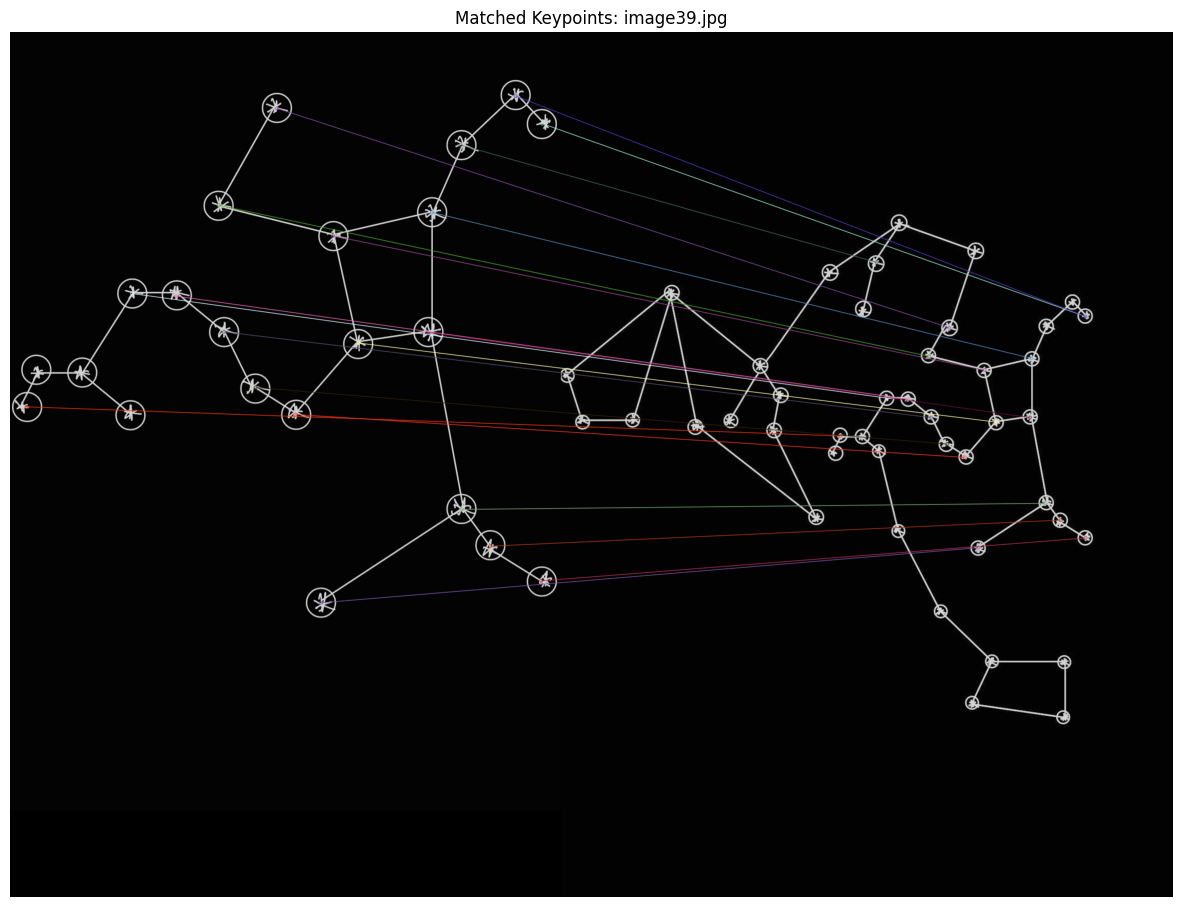

Processing /kaggle/input/stargazer/Contellations Segmentation/test/Challenge2.jpg
Best matching constellation: image35.jpg with 6 inliers


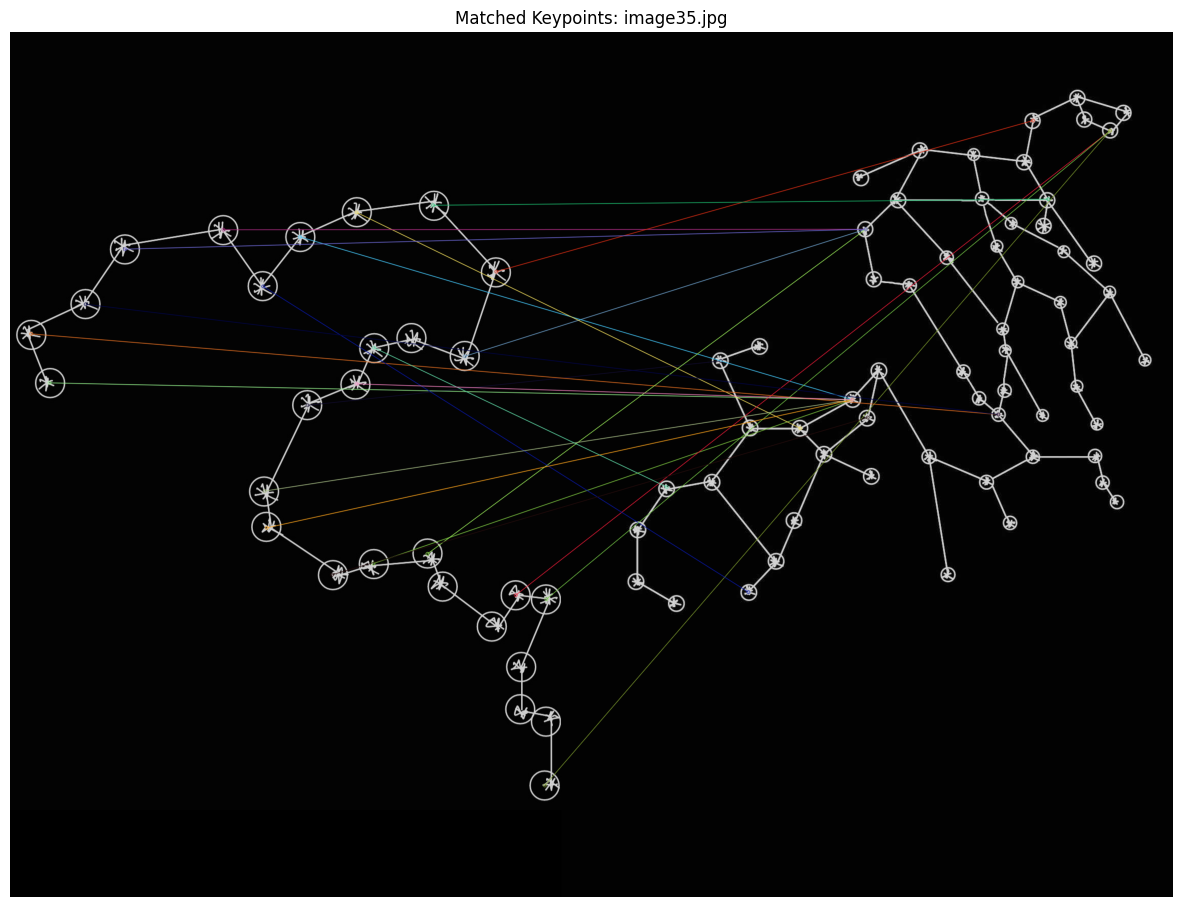

In [30]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# Define paths
train_dir = '/kaggle/input/stargazer/Contellations Segmentation/train'
challenge_image_paths = [
    '/kaggle/input/stargazer/Contellations Segmentation/test/Challenge1.jpg',
    '/kaggle/input/stargazer/Contellations Segmentation/test/Challenge2.jpg'
]

# Load training constellations
def load_training_data(train_dir):
    training_images = []
    for file_name in os.listdir(train_dir):
        if file_name.endswith('.jpg'):
            image_path = os.path.join(train_dir, file_name)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            keypoints = detect_stars(image)
            training_images.append((file_name, image, keypoints))
    return training_images

# Detect stars function
def detect_stars(image):
    blurred = cv2.GaussianBlur(image, (9, 9), 0)
    _, thresholded = cv2.threshold(blurred, 100, 255, cv2.THRESH_BINARY)
    circles = cv2.HoughCircles(thresholded, cv2.HOUGH_GRADIENT, dp=1.2, minDist=30,
                               param1=50, param2=30, minRadius=5, maxRadius=30)
    coords = []
    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        for (x, y, r) in circles:
            coords.append((x, y))
    return coords

# Compute normalized K distances function
def compute_normalized_k_distances(keypoints, k=5):
    distances = cdist(keypoints, keypoints, metric='euclidean')
    normalized_k_distances = []
    for row in distances:
        non_zero_distances = row[row != 0]
        sorted_distances = np.sort(non_zero_distances)[:k]
        if len(sorted_distances) < k:
            sorted_distances = np.pad(sorted_distances, (0, k - len(sorted_distances)), 'constant', constant_values=np.inf)
        average_distance = np.mean(sorted_distances)
        if np.isfinite(average_distance) and average_distance != 0:
            normalized_distances = sorted_distances / average_distance
        else:
            normalized_distances = sorted_distances
        normalized_k_distances.append(normalized_distances)
    return np.array(normalized_k_distances)

# Determine adaptive k value based on the number of keypoints
def determine_k(num_keypoints):
    if num_keypoints < 10:
        return 4
    elif num_keypoints < 20:
        return 8
    elif num_keypoints < 50:
        return 12
    else:
        return 16

# Load all training data
training_data = load_training_data(train_dir)

# Sort training data by number of keypoints
training_data.sort(key=lambda x: len(x[2]), reverse=True)

# Define the percentage threshold for good matches
percent_threshold = 0.7  # Adjust as needed

# Process each challenge image
for challenge_image_path in challenge_image_paths:
    print(f"Processing {challenge_image_path}")
    challenge_image = cv2.imread(challenge_image_path, cv2.IMREAD_GRAYSCALE)
    challenge_keypoints = detect_stars(challenge_image)
    
    best_constellation = None
    max_inliers = 0
    
    for file_name, train_image, train_keypoints in training_data:
        if not train_keypoints:
            continue

        # Determine the larger set of keypoints between training and challenge images
        max_keypoints = max(len(train_keypoints), len(challenge_keypoints))
        train_k = determine_k(max_keypoints)
        challenge_k = train_k

        train_descriptors = compute_normalized_k_distances(train_keypoints, k=train_k)
        challenge_descriptors = compute_normalized_k_distances(challenge_keypoints, k=challenge_k)
        
        # Match descriptors using Euclidean distance
        matches = []
        for i, train_desc in enumerate(train_descriptors):
            distances = cdist([train_desc], challenge_descriptors, metric='euclidean')[0]
            min_index = np.argmin(distances)
            matches.append((i, min_index, distances[min_index]))
        
        # Filter matches based on a distance threshold
        good_matches = [(i, j, dist) for i, j, dist in matches if dist < 0.30]  # Adjust threshold as needed
        
        if len(good_matches) < 4:
            continue
        
        # Extract matched keypoints
        src_pts = np.float32([train_keypoints[i] for i, j, dist in good_matches]).reshape(-1, 2)
        dst_pts = np.float32([challenge_keypoints[j] for i, j, dist in good_matches]).reshape(-1, 2)
        
        # Find homography using RANSAC
        M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 1)
        if mask is not None:
            inliers = mask.sum()
            if inliers > max_inliers:
                max_inliers = inliers
                best_constellation = (file_name, good_matches, M, train_image, train_keypoints, challenge_keypoints, inliers)
    
    # Visualization of the best matching constellation
    if best_constellation:
        file_name, good_matches, M, train_image, train_keypoints, challenge_keypoints_orig, inliers = best_constellation
        print(f"Best matching constellation: {file_name} with {inliers} inliers")
        
        def draw_matches(img1, kp1, img2, kp2, matches):
            img1_kp = [cv2.KeyPoint(float(p[0]), float(p[1]), 1) for p in kp1]
            img2_kp = [cv2.KeyPoint(float(p[0]), float(p[1]), 1) for p in kp2]
            cv_matches = [cv2.DMatch(_queryIdx=i, _trainIdx=j, _distance=dist) for i, (i, j, dist) in enumerate(matches)]
            match_img = cv2.drawMatches(img1, img1_kp, img2, img2_kp, cv_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
            return match_img
        
        match_img = draw_matches(train_image, train_keypoints, challenge_image, challenge_keypoints_orig, good_matches)
        
        # Plot the matching keypoints
        plt.figure(figsize=(15, 15))
        plt.imshow(match_img)
        plt.title(f'Matched Keypoints: {file_name}')
        plt.axis('off')
        plt.show()


# Adding angle descriptor

Processing /kaggle/input/stargazer/Contellations Segmentation/test/Challenge1.jpg
Constellation image35.jpg passed the distance check with 5 matches
Keypoint 19 in constellation image35.jpg matches with keypoint 13 in challenge image with distance 0.19167487868851646 and angle distance 7.177773897980795
Keypoint 5 in constellation image35.jpg matches with keypoint 18 in challenge image with distance 0.18722544787961942 and angle distance 7.806355975843333
Keypoint 2 in constellation image35.jpg matches with keypoint 32 in challenge image with distance 0.18433151614324522 and angle distance 8.028964411957066
Keypoint 17 in constellation image35.jpg matches with keypoint 40 in challenge image with distance 0.18780307274476687 and angle distance 8.524820608089366
Keypoint 8 in constellation image35.jpg matches with keypoint 10 in challenge image with distance 0.18912311715762403 and angle distance 11.894710635521923
Constellation image35.jpg has an average angle distance of 8.686525105878

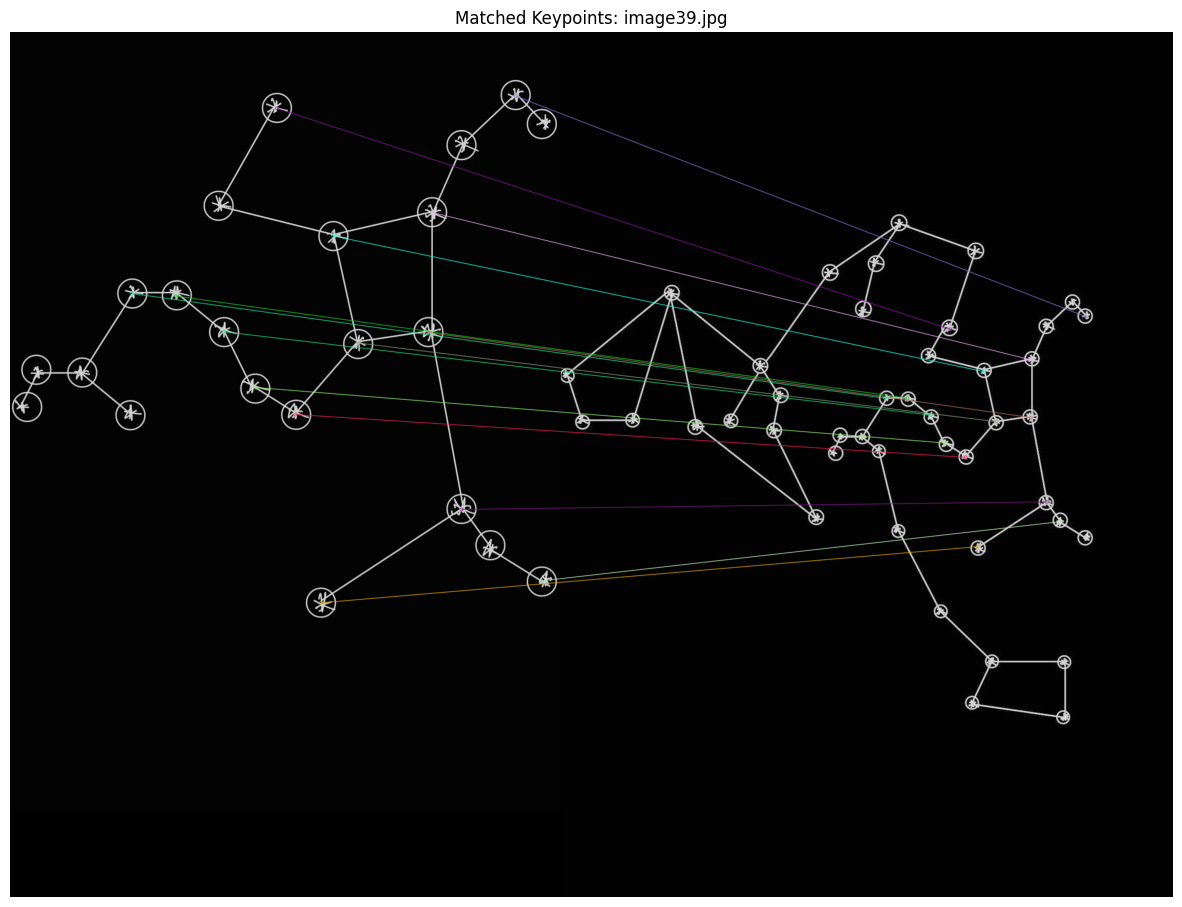

Processing /kaggle/input/stargazer/Contellations Segmentation/test/Challenge2.jpg
Constellation image35.jpg passed the distance check with 4 matches
Keypoint 5 in constellation image35.jpg matches with keypoint 18 in challenge image with distance 0.195362947567757 and angle distance 9.463036771516972
Keypoint 3 in constellation image35.jpg matches with keypoint 2 in challenge image with distance 0.19847423673672984 and angle distance 11.119485988926966
Keypoint 0 in constellation image35.jpg matches with keypoint 45 in challenge image with distance 0.19255206421269205 and angle distance 12.330652477940543
Keypoint 25 in constellation image35.jpg matches with keypoint 21 in challenge image with distance 0.19029300925701215 and angle distance 14.496424050552667
Constellation image35.jpg has an average angle distance of 11.852399822234288
Constellation image59.jpg passed the distance check with 4 matches
Keypoint 3 in constellation image59.jpg matches with keypoint 51 in challenge image w

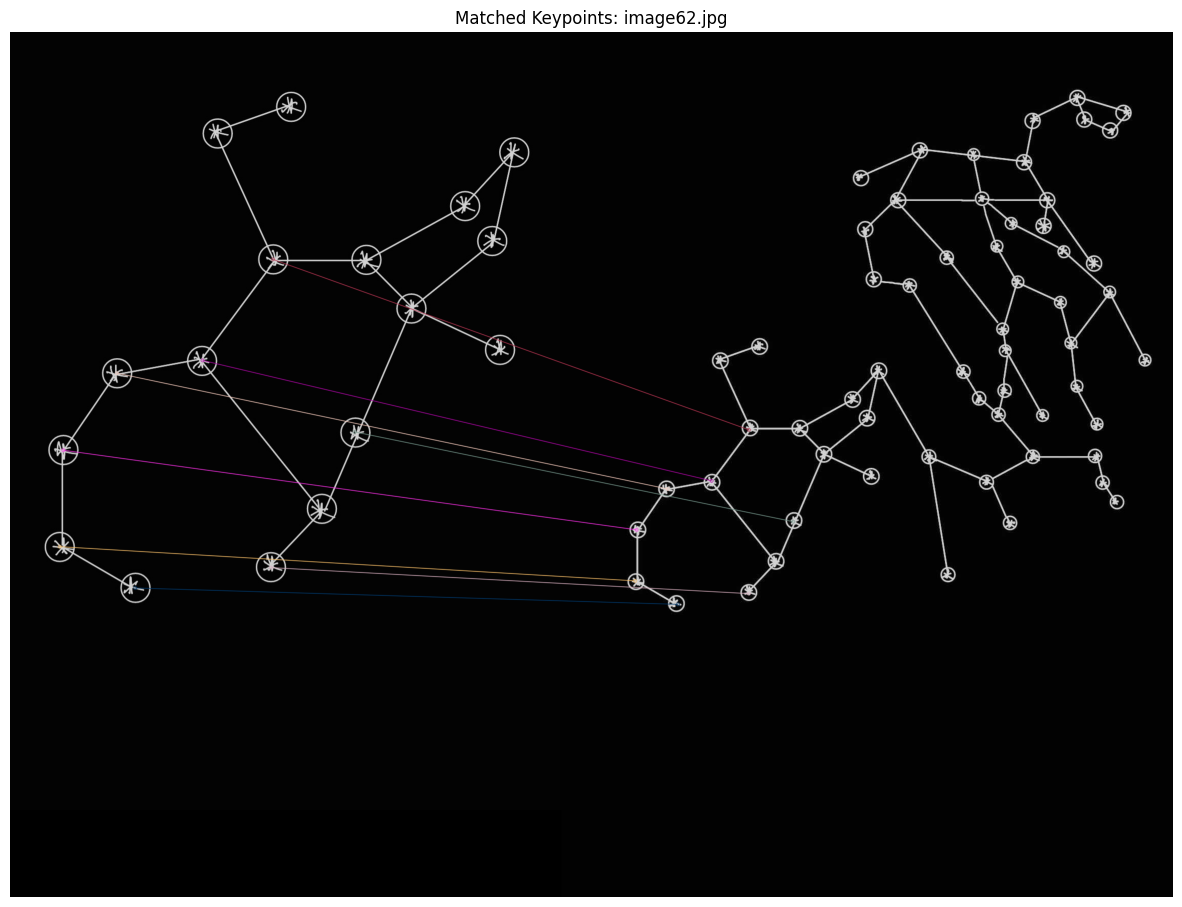

In [6]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import time

# Define paths
train_dir = '/kaggle/input/stargazer/Contellations Segmentation/train'
challenge_image_paths = [
    '/kaggle/input/stargazer/Contellations Segmentation/test/Challenge1.jpg',
    '/kaggle/input/stargazer/Contellations Segmentation/test/Challenge2.jpg'
]

# Detect stars in training images
def detect_stars_training(image, visualize=False):
    blurred = cv2.GaussianBlur(image, (9, 9), 0)  # Apply Gaussian blur to reduce noise
    _, thresholded = cv2.threshold(blurred, 100, 255, cv2.THRESH_BINARY)  # Convert image to binary
    
    if visualize:
        plt.figure(figsize=(15, 15))
        plt.imshow(thresholded, cmap='gray')
        plt.title("Thresholded Image (Training)")
        plt.axis('off')
        plt.show()
    
    # Detect circles using Hough Circle Transform
    circles = cv2.HoughCircles(thresholded, cv2.HOUGH_GRADIENT, dp=1.2, minDist=30,
                               param1=50, param2=30, minRadius=5, maxRadius=30)
    coords = []
    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        for (x, y, r) in circles:
            coords.append((x, y))
    return coords

# Detect stars in testing images
def detect_stars_testing(image, visualize=False):
    blurred = cv2.GaussianBlur(image, (9, 9), 0)  # Apply Gaussian blur to reduce noise
    _, thresholded = cv2.threshold(blurred, 100, 255, cv2.THRESH_BINARY)  # Convert image to binary
    
    if visualize:
        plt.figure(figsize=(15, 15))
        plt.imshow(thresholded, cmap='gray')
        plt.title("Thresholded Image (Testing)")
        plt.axis('off')
        plt.show()
    
    # Detect circles using Hough Circle Transform
    circles = cv2.HoughCircles(thresholded, cv2.HOUGH_GRADIENT, dp=1.2, minDist=30,
                               param1=15, param2=15, minRadius=2, maxRadius=15)
    coords = []
    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        for (x, y, r) in circles:
            coords.append((x, y))
    return coords

# Load training constellations
def load_training_data(train_dir):
    training_images = []
    for file_name in os.listdir(train_dir):
        if file_name.endswith('.jpg'):
            image_path = os.path.join(train_dir, file_name)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            keypoints = detect_stars_training(image)
            training_images.append((file_name, image, keypoints))
    return training_images

# Compute normalized K distances function
def compute_normalized_k_distances(keypoints, k=5):
    distances = cdist(keypoints, keypoints, metric='euclidean')
    normalized_k_distances = []
    for i, row in enumerate(distances):
        non_zero_distances = row[row != 0]
        sorted_distances = np.sort(non_zero_distances)[:k]
        if len(sorted_distances) < k:
            sorted_distances = np.pad(sorted_distances, (0, k - len(sorted_distances)), 'constant', constant_values=np.inf)
        average_distance = np.mean(sorted_distances)
        if np.isfinite(average_distance) and average_distance != 0:
            normalized_distances = sorted_distances / average_distance
        else:
            normalized_distances = sorted_distances
        normalized_k_distances.append(normalized_distances)
    
    return np.array(normalized_k_distances)

# Compute relative angles function
def compute_relative_angles(keypoints, k=5):
    distances = cdist(keypoints, keypoints, metric='euclidean')
    relative_angles = []
    for i, row in enumerate(distances):
        non_zero_distances = row[row != 0]
        sorted_distances = np.sort(non_zero_distances)[:k]
        if len(sorted_distances) < k:
            sorted_distances = np.pad(sorted_distances, (0, k - len(sorted_distances)), 'constant', constant_values=np.inf)
        
        angles = []
        for dist in sorted_distances:
            if dist != np.inf:
                neighbor_index = np.where(row == dist)[0][0]
                dx = keypoints[i][0] - keypoints[neighbor_index][0]
                dy = keypoints[i][1] - keypoints[neighbor_index][1]
                angle = np.arctan2(dy, dx)
                angles.append(angle)
            else:
                angles.append(np.inf)
        
        relative_angles.append(angles)
    
    return np.array(relative_angles)

# Determine adaptive k value based on the number of keypoints
def determine_k(num_keypoints):
    if num_keypoints < 10:
        return 4
    elif num_keypoints < 20:
        return 8
    elif num_keypoints < 50:
        return 12
    else:
        return 16

# Load all training data
training_data = load_training_data(train_dir)

# Sort training data by number of keypoints
training_data.sort(key=lambda x: len(x[2]), reverse=True)

# Define the percentage threshold for good matches
percent_threshold = 0.7  # Adjust as needed

# Process each challenge image
for challenge_image_path in challenge_image_paths:
    print(f"Processing {challenge_image_path}")
    challenge_image = cv2.imread(challenge_image_path, cv2.IMREAD_GRAYSCALE)
    challenge_keypoints = detect_stars_testing(challenge_image)
    
    best_constellation = None
    min_avg_angle_distance = float('inf')
    
    start_time = time.time()  # Start timing the matching process
    
    for file_name, train_image, train_keypoints in training_data:
        if not train_keypoints:
            continue

        # Determine the larger set of keypoints between training and challenge images
        max_keypoints = max(len(train_keypoints), len(challenge_keypoints))
        train_k = determine_k(max_keypoints)
        challenge_k = train_k

        train_distances = compute_normalized_k_distances(train_keypoints, k=train_k)
        challenge_distances = compute_normalized_k_distances(challenge_keypoints, k=challenge_k)
        
        # Match descriptors using Euclidean distance
        matches = []
        for i, train_desc in enumerate(train_distances):
            distances = cdist([train_desc], challenge_distances, metric='euclidean')[0]
            min_index = np.argmin(distances)
            matches.append((i, min_index, distances[min_index]))
        
        # Filter matches based on a distance threshold
        good_matches = [(i, j, dist) for i, j, dist in matches if dist < 0.2]  # Adjust threshold as needed

        if len(good_matches) < 4:
            continue
        
        # Ensure each keypoint in the challenge image matches only once
        matched_challenge_points = set()
        filtered_matches = []
        for match in good_matches:
            if match[1] not in matched_challenge_points:
                filtered_matches.append(match)
                matched_challenge_points.add(match[1])
        
        print(f"Constellation {file_name} passed the distance check with {len(filtered_matches)} matches")
        
        train_angles = compute_relative_angles(train_keypoints, k=train_k)
        challenge_angles = compute_relative_angles(challenge_keypoints, k=challenge_k)
        
        # Refine matches using angle descriptors
        refined_matches = []
        for i, j, dist in filtered_matches:
            angle_distances = cdist([train_angles[i]], [challenge_angles[j]], metric='euclidean')[0]
            angle_distance = angle_distances[0]
            refined_matches.append((i, j, dist, angle_distance))
        
        # Sort refined matches by angle distance
        refined_matches.sort(key=lambda x: x[3])

        for i, j, dist, angle_dist in refined_matches:
            print(f"Keypoint {i} in constellation {file_name} matches with keypoint {j} in challenge image with distance {dist} and angle distance {angle_dist}")

        # Calculate average angle distance
        avg_angle_distance = np.mean([x[3] for x in refined_matches])
        print(f"Constellation {file_name} has an average angle distance of {avg_angle_distance}")
        
        if avg_angle_distance < min_avg_angle_distance:
            min_avg_angle_distance = avg_angle_distance
            best_constellation = (file_name, refined_matches, train_image, train_keypoints, challenge_keypoints)
    
    end_time = time.time()  # End timing the matching process
    total_time = end_time - start_time
    print(f"Time taken for matching process: {total_time:.2f} seconds")
    
    # Visualization of the best matching constellation
    if best_constellation:
        file_name, refined_matches, train_image, train_keypoints, challenge_keypoints_orig = best_constellation
        print(f"Best matching constellation: {file_name} with an average angle distance of {min_avg_angle_distance}")
        
        def draw_matches(img1, kp1, img2, kp2, matches):
            img1_kp = [cv2.KeyPoint(float(p[0]), float(p[1]), 1) for p in kp1]
            img2_kp = [cv2.KeyPoint(float(p[0]), float(p[1]), 1) for p in kp2]
            cv_matches = [cv2.DMatch(_queryIdx=i, _trainIdx=j, _distance=dist) for i, (i, j, dist, angle_dist) in enumerate(matches)]
            match_img = cv2.drawMatches(img1, img1_kp, img2, img2_kp, cv_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
            return match_img
        
        match_img = draw_matches(train_image, train_keypoints, challenge_image, challenge_keypoints_orig, refined_matches)
        
        # Plot the matching keypoints
        plt.figure(figsize=(15, 15))
        plt.imshow(match_img)
        plt.title(f'Matched Keypoints: {file_name}')
        plt.axis('off')
        plt.show()
